In [146]:
import pickle
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
FILE_NAME = "data_2022-08-05_20-30-09.pkl"

In [148]:
def read_file(file_path: str):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
    

In [149]:
data = read_file("test_data/" + FILE_NAME)

In [150]:
data_transformed = {ts: pd.Series({str(idx): value for idx, value in np.ndenumerate(value_matrix)}) for ts, value_matrix in data.items()}
df = pd.DataFrame.from_dict(data_transformed, orient='index')
df = df.melt(ignore_index=False, var_name='matrix_idx')
df.index.name = 'ts'
df.reset_index(inplace= True)
df

,ts,matrix_idx,value
0,2022-08-05 20:27:10.811450,"(0, 0)",241.0
1,2022-08-05 20:27:10.822115,"(0, 0)",241.0
2,2022-08-05 20:27:10.832092,"(0, 0)",241.0
3,2022-08-05 20:27:10.841745,"(0, 0)",241.0
4,2022-08-05 20:27:10.851044,"(0, 0)",241.0
...,...,...,...
23995,2022-08-05 20:30:09.587351,"(3, 5)",0.0
23996,2022-08-05 20:30:09.594131,"(3, 5)",0.0
23997,2022-08-05 20:30:09.603543,"(3, 5)",0.0
23998,2022-08-05 20:30:09.610508,"(3, 5)",0.0


<AxesSubplot:xlabel='ts', ylabel='value'>

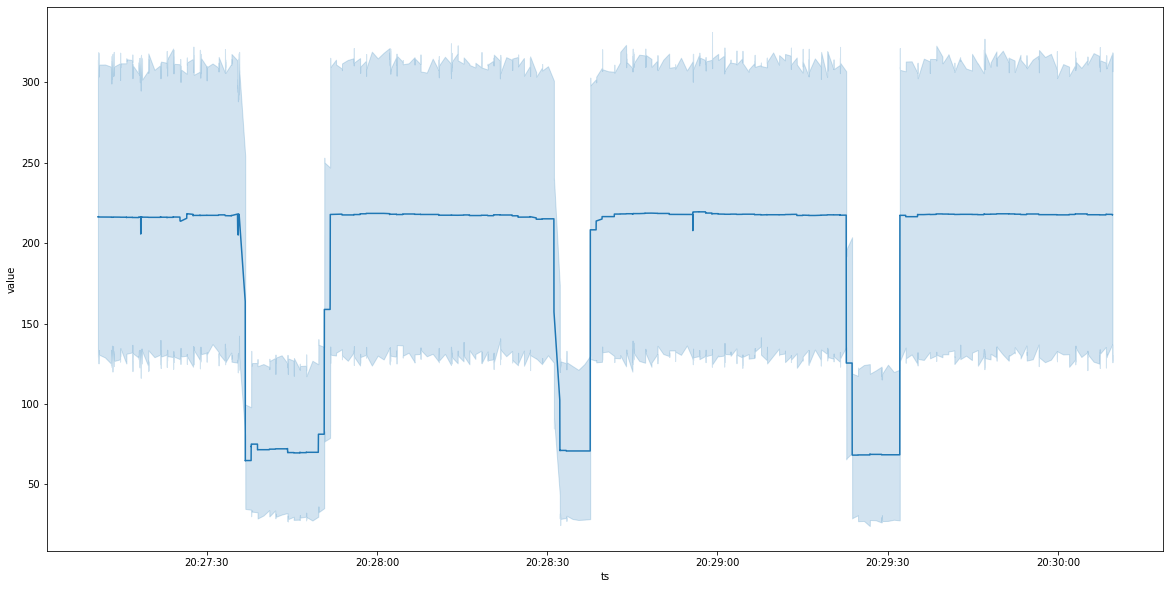

In [151]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(ax=ax, data=df, x='ts', y='value')

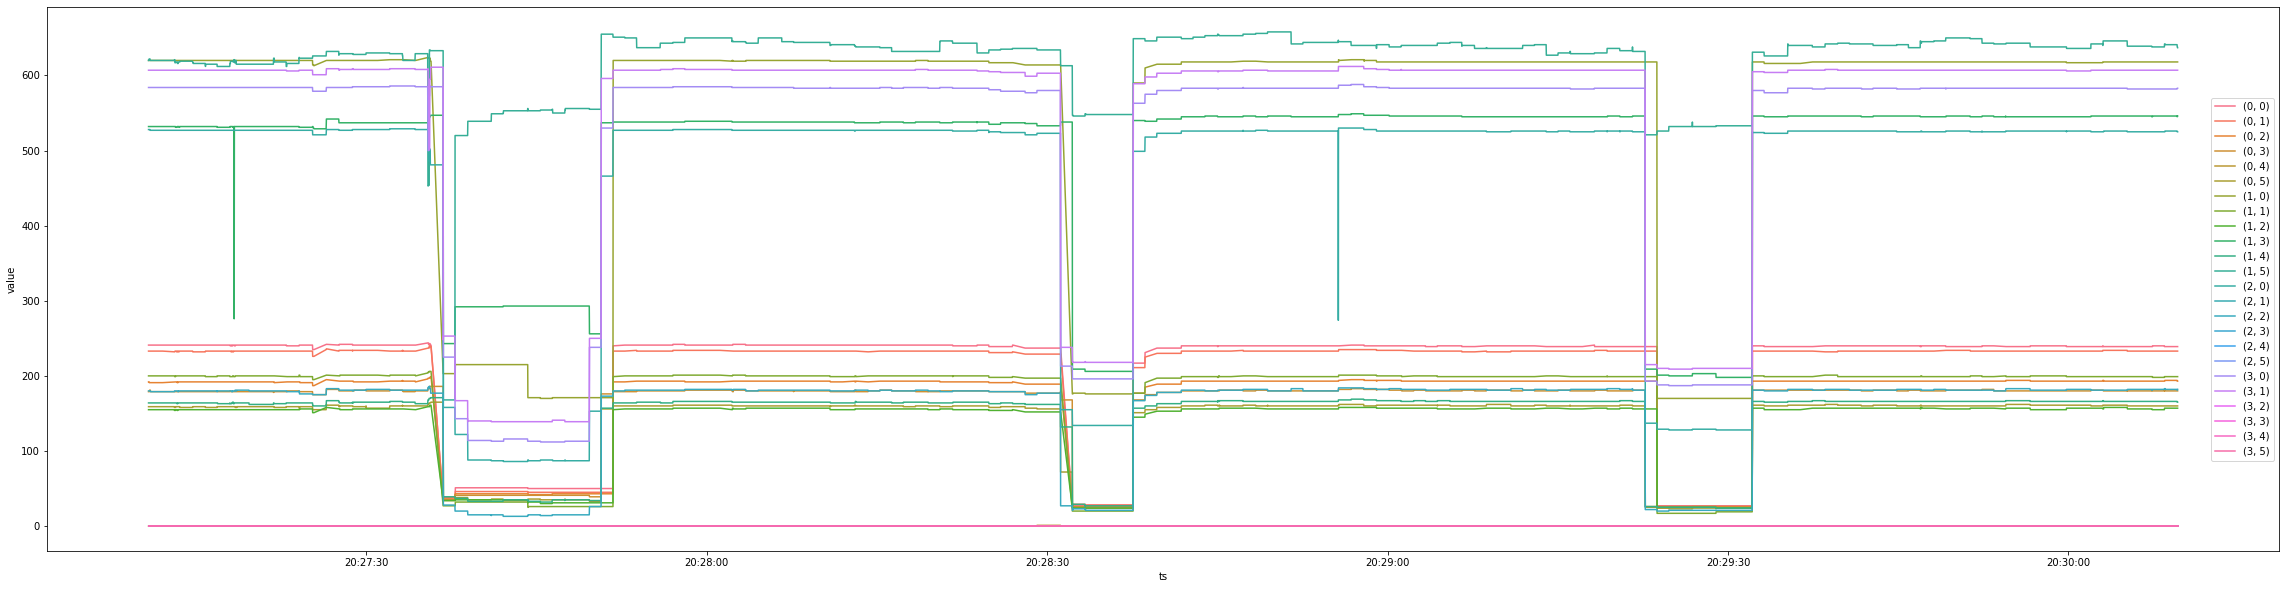

In [152]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
plt.legend(loc="center right")

In [167]:
CREATE_MARKERS = False

In [154]:
def create_shadow_marker():
    marker = {}
    sub_markers = ['start_shadow', 'end_shadow']
    for sub_marker in sub_markers:
        print(f"Press key for '{sub_marker}'")
        input()  # just wait for any keypress
        marker[sub_marker] = datetime.now()
    return marker

In [161]:
if CREATE_MARKERS:
    markers = []

In [165]:
if CREATE_MARKERS:
    markers.append(create_shadow_marker())

Press key for 'start_shadow'
Press key for 'end_shadow'


In [166]:
markers

[{'start_shadow': datetime.datetime(2022, 8, 6, 13, 11, 40, 139042),
  'end_shadow': datetime.datetime(2022, 8, 6, 13, 11, 52, 502123)},
 {'start_shadow': datetime.datetime(2022, 8, 6, 13, 12, 5, 309793),
  'end_shadow': datetime.datetime(2022, 8, 6, 13, 12, 15, 549403)},
 {'start_shadow': datetime.datetime(2022, 8, 6, 13, 12, 34, 631076),
  'end_shadow': datetime.datetime(2022, 8, 6, 13, 12, 45, 647669)},
 {'start_shadow': datetime.datetime(2022, 8, 6, 13, 13, 33, 164210),
  'end_shadow': datetime.datetime(2022, 8, 6, 13, 13, 54, 878989)}]

In [158]:
def plot_with_shadow_markers(data, markers):
    color_map = {'start_shadow': 'orange', 'end_shadow': 'blue'}

    fig, ax = plt.subplots(figsize=(40, 10))
    for marker in markers:
        for sub_marker, ts in marker.items():
            ax.axvline(ts, color=color_map[sub_marker])
    sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
    plt.legend(loc="center right")

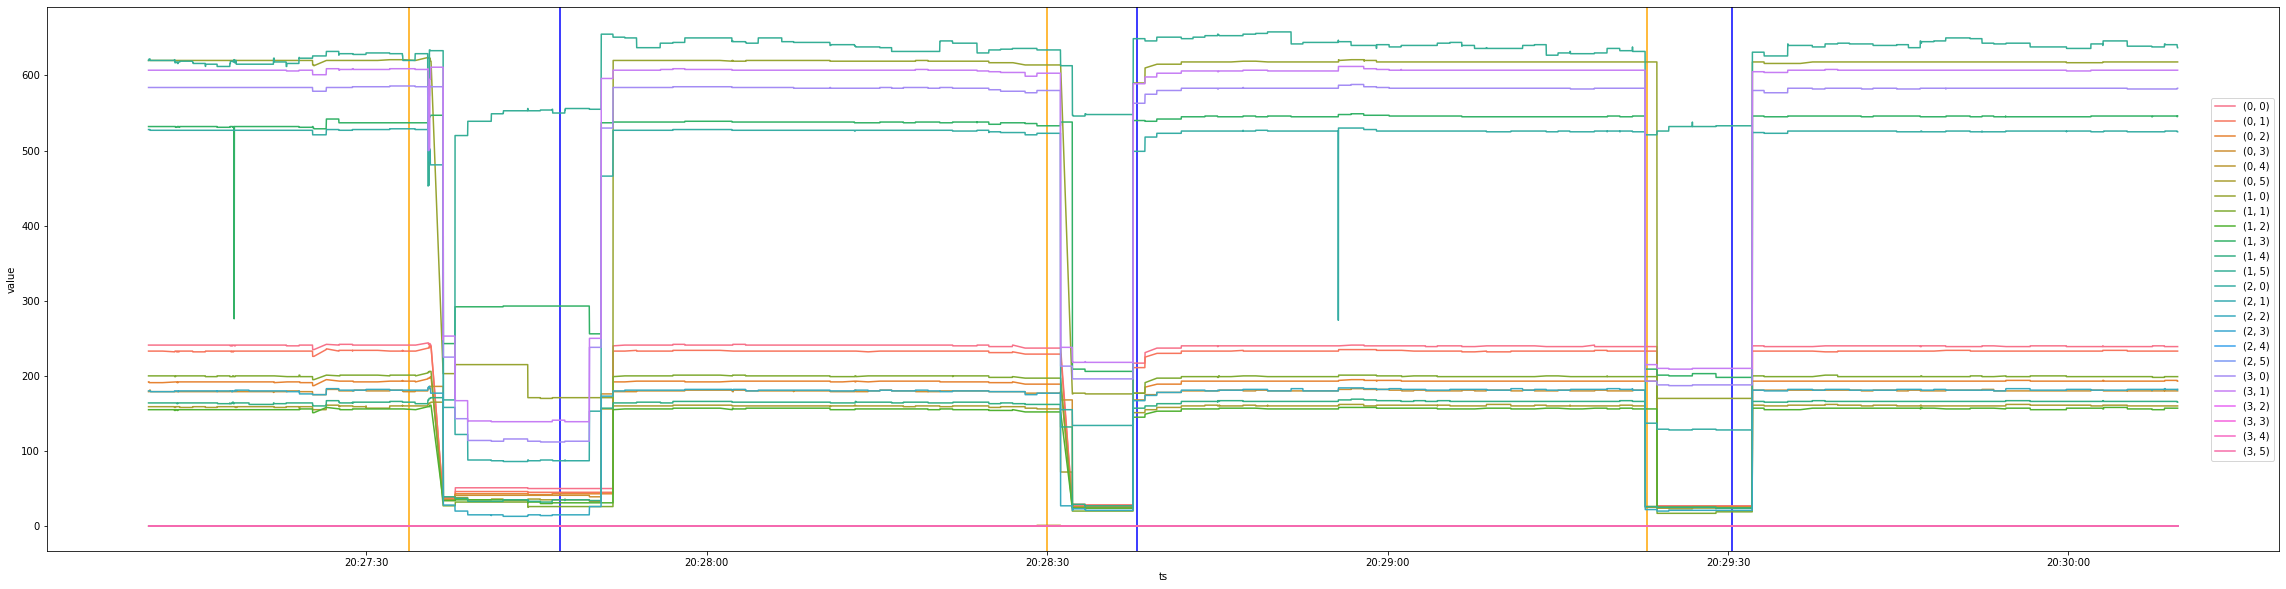

In [159]:
plot_with_shadow_markers(data, markers)